Converged epsilon value: 0.9999999767771897
Converged epsilon value: 2.999999401945388
Converged epsilon value: 4.999989530420862
Converged epsilon value: 6.999883169308305
Converged epsilon value: 8.999060604721308
Eigenvalues (epsilon_n): [0.99999998 2.9999994  4.99998953 6.99988317 8.9990606 ]
Eigenfunctions (absolute values): [[2.56183470e-04 1.45461736e-03 5.66711043e-03 1.74588473e-02
  4.50516581e-02]
 [3.76940965e-04 2.08377489e-03 7.88695716e-03 2.35399838e-02
  5.86293689e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583001e-02
  7.58483956e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281002e-02
  9.71899059e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048286e-02
  1.23080898e-01]
 [1.64382706e-03 8.13893182e-03 2.73391696e-02 7.15653847e-02
  1.53831231e-01]
 [2.32055909e-03 1.11600069e-02 3.63163648e-02 9.17795041e-02
  1.89559851e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171080e-01
  2.30113233e-01]
 [4.48904553e-03 2.03165046e

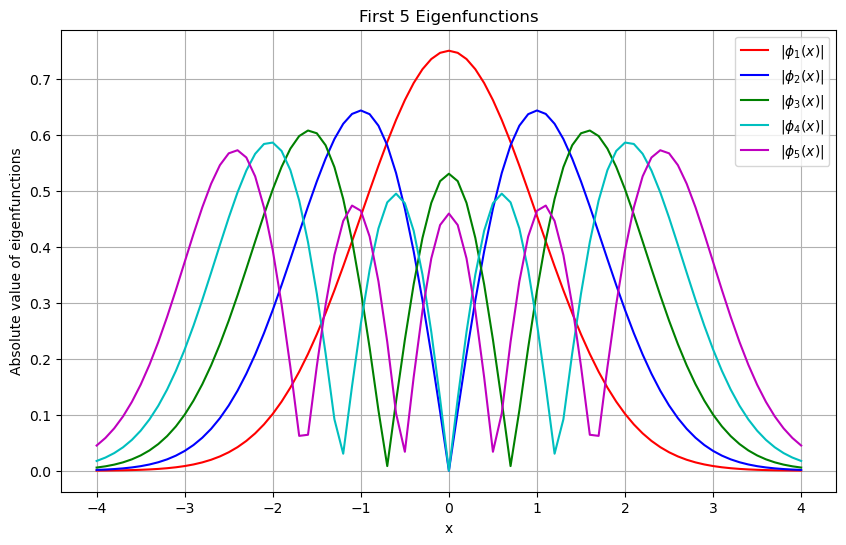

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# BVP equation for the harmonic oscillator
def bvp_rhs(y, x, epsilon_n, K):
    return [y[1], (K * x**2 - epsilon_n) * y[0]]

# Normalize the eigenfunction using trapezoidal integration
def normalize_function(phi_n, xspan):
    norm_factor = np.trapz(np.abs(phi_n)**2, xspan)
    return phi_n / np.sqrt(norm_factor)

# Shooting method to find the eigenvalues and corresponding eigenfunctions
def shoot_eigenvalue(epsilon_guess, xspan, K):
    solution = odeint(bvp_rhs, y0, xspan, args=(epsilon_guess, K))
    return solution[:, 0]

# Parameters
L = 4 
K = 1 
xspan = np.linspace(-L, L, 81)  # x values from -L to L with 81 points
eigenvalues = []  # Store the eigenvalues
eigenfunctions = np.zeros((len(xspan), 5))  # Store the absolute value of the eigenfunctions

col = ['r', 'b', 'g', 'c', 'm']

# Loop over the first 5 eigenvalues/modes
for n in range(5):
    epsilon_guess = (n + 1) * 2  # Starting guess for eigenvalue 
    depsilon = 1.0  # Initial step size for eigenvalue adjustment

    # Shooting method with iterative eigenvalue adjustment
    for _ in range(1000):
        # Initial conditions
        y0 = [1, np.sqrt(L**2 - epsilon_guess)]
        y = odeint(bvp_rhs, y0, xspan, args=(epsilon_guess, K))

        # Check boundary condition to determine convergence
        if np.abs(y[-1, 1] + np.sqrt(L**2 - epsilon_guess) * y[-1, 0]) < 1e-6:
            print("Converged epsilon value:", epsilon_guess)
            eigenvalues.append(epsilon_guess)
            break

        # Adjust the guess for eigenvalue based on boundary behavior
        if (-1) ** (n + 1) * (y[-1, 1] + np.sqrt(L**2 - epsilon_guess) * y[-1, 0]) > 0:
            epsilon_guess -= depsilon  
        else:
            epsilon_guess += depsilon / 2  
            depsilon /= 2  
            
    # Normalize the eigenfunction using trapezoidal integration
    phi_n_normalized = normalize_function(y[:, 0], xspan)
    
    # Store the absolute value of the normalized eigenfunction
    eigenfunctions[:, n] = np.abs(phi_n_normalized)

# Convert eigenvalues list to numpy array
eigenvalues = np.array(eigenvalues)

A1 = eigenfunctions
A2 = eigenvalues

# Display the results
print("Eigenvalues (epsilon_n):", A2)
print("Eigenfunctions (absolute values):", A1)

# Plot the eigenfunctions
plt.figure(figsize=(10, 6))
for n in range(5):
    plt.plot(xspan, eigenfunctions[:, n], col[n], label=f"$|\\phi_{{{n+1}}}(x)|$")  
plt.xlabel("x")
plt.ylabel("Absolute value of eigenfunctions")
plt.title("First 5 Eigenfunctions")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
np.shape(eigenvalues)

(5,)

In [21]:
np.shape(eigenfunctions)

(81, 5)